# AIVLE스쿨 2차 미니프로젝트: 신규 아파트 주차 수요 예측

<img src = "https://github.com/Jangrae/img/blob/master/parking.png?raw=true" width=800, align="left"/>

# 단계 2: 탐색적 데이터 분석

## [미션]

단계1 에서 생성한 데이터에 대해서 탐색적 분석을 수행합니다.

1) 단변량 분석
    - 숫자형, 범주형 변수에 맞게 데이터를 탐색하며 비즈니스적 의미를 파악합니다.
2) 이변량 분석
    - 숫자형 변수 → 실차량수 상관관계를 분석합니다.    
    - 범주형 변수 → 실차량수 관계를 분석합니다.
3) 전처리(추가)
    - 범주형 변수 중에는 범줏값 개수가 적은 범주들은 유사한 범주끼리 묶어 봅니다.
    - 불필요한 변수를 제거합니다.

## 1. 환경설정

### (1) 로컬 수행(Anaconda)

- project 폴더에 필요한 파일들을 넣고, 본 파일을 열었다면, 별도 경로 지정이 필요하지 않습니다.

In [ ]:
# 기본 경로
path = ''

### (2) 구글 콜랩 수행

- 구글 콜랩을 사용중이면 구글 드라이브를 연결합니다.

In [16]:
# 구글 드라이브 연결, 패스 지정
import sys
if 'google.colab' in sys.modules:
    from google.colab import drive
    drive.mount('/content/drive')
    path = '/content/drive/MyDrive/project/'

### (3) 한글 폰트 표시용 라이브러리 설치

In [ ]:
# 한글 표시를 위한 라이브러리 설치
# !pip install koreanize_matplotlib -q

### (4) 라이브러리 불러오기

In [152]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns

import joblib
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format='retina'

### (5) 데이터 불러오기

- joblib.dump() 함수를 사용해 이전에 저장했던 base_data1.pkl 파일을 읽어옵니다.
- 읽어온 데이터를 apart 데이터프레임으로 선언합니다.

#### 1) 데이터 불러오기

In [157]:
# 파일 불러오기
apart = joblib.load('base_data1.pkl')

#### 2) 기본 정보 조회

In [160]:
apart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345 entries, 0 to 344
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   단지코드     345 non-null    object 
 1   총세대수     345 non-null    int64  
 2   지역       345 non-null    object 
 3   준공연도     345 non-null    int32  
 4   건물형태     345 non-null    object 
 5   난방방식     345 non-null    object 
 6   승강기설치여부  345 non-null    object 
 7   실차량수     345 non-null    int64  
 8   총면적      345 non-null    float64
 9   10-30    345 non-null    int64  
 10  30-40    345 non-null    int64  
 11  40-50    345 non-null    int64  
 12  50-60    345 non-null    int64  
 13  60-70    345 non-null    int64  
 14  70-80    345 non-null    int64  
 15  80-200   345 non-null    int64  
 16  임대보증금    345 non-null    float64
 17  임대료      345 non-null    float64
dtypes: float64(3), int32(1), int64(9), object(5)
memory usage: 47.3+ KB


결측치 없음. 345개

In [163]:
apart.shape

(345, 18)

In [165]:
apart.describe()

,총세대수,준공연도,실차량수,총면적,10-30,30-40,40-50,50-60,60-70,70-80,80-200,임대보증금,임대료
count,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,3.450000e+02,345.000000
mean,546.759420,2007.713043,555.431884,37282.661962,45.837681,169.347826,147.620290,132.889855,1.852174,16.895652,34.515942,2.382737e+07,197729.050210
std,432.359538,7.261036,374.640474,29588.197927,161.133746,223.039796,216.584543,252.947082,32.771294,76.441995,116.975949,2.247481e+07,158760.777669
min,1.000000,1992.000000,21.000000,68.930000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,178.000000,2003.000000,258.000000,11293.832100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.272491e+07,112905.000000
50%,491.000000,2008.000000,498.000000,32190.360000,0.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.930850e+07,172000.000000
75%,853.000000,2013.000000,822.000000,56189.979600,0.000000,298.000000,264.000000,150.000000,0.000000,0.000000,0.000000,2.837700e+07,227564.000000
max,2289.000000,2022.000000,1657.000000,150126.863200,1181.000000,1429.000000,1258.000000,1444.000000,608.000000,756.000000,850.000000,1.898219e+08,950305.000000


In [167]:
apart.head()

,단지코드,총세대수,지역,준공연도,건물형태,난방방식,승강기설치여부,실차량수,총면적,10-30,30-40,40-50,50-60,60-70,70-80,80-200,임대보증금,임대료
0,C0001,78,서울,2013,계단식,개별가스난방,전체동 설치,109,6023.7683,0,0,0,78,0,0,0,5.696200e+07,642930.000000
1,C0002,35,서울,2013,복도식,개별가스난방,전체동 설치,35,1569.1668,35,0,0,0,0,0,0,6.306200e+07,470100.000000
2,C0003,88,서울,2013,계단식,개별가스난방,전체동 설치,88,7180.1396,0,0,0,88,0,0,0,7.219000e+07,586540.000000
3,C0004,477,서울,2014,복도식,지역난방,전체동 설치,943,47058.9273,0,0,0,150,0,216,111,1.015167e+08,950305.000000
4,C0006,15,서울,2013,복도식,개별가스난방,전체동 설치,21,543.0268,15,0,0,0,0,0,0,5.522750e+07,340148.333333


## 2. 기본 분석

- 기술통계정보, 결측치 확인 등 기본 분석을 수행합니다.

In [170]:
apart.isna().sum()

단지코드       0
총세대수       0
지역         0
준공연도       0
건물형태       0
난방방식       0
승강기설치여부    0
실차량수       0
총면적        0
10-30      0
30-40      0
40-50      0
50-60      0
60-70      0
70-80      0
80-200     0
임대보증금      0
임대료        0
dtype: int64

## 3. 단변량 분석

- 주요 변수들을 연속형, 범주형으로 구분하여 데이터 분포를 살펴보며 비즈니스적인 의미를 파악합니다.
    - 연속형: '실차량수', '총세대수', '총면적', '준공연도', '임대료', '임대보증금'
    - 범주형: '지역', '건물형태', '난방방식', '승강기설치여부'
- 전용면적구간은 pd.melt() 함수를 사용해 pivot을 해제한 후 분석합니다.

### (1) 연속형 변수

- 대상: '실차량수', '총세대수', '총면적', '준공연도', '임대료', '임대보증금'
- 기술통계, Histogram, Boxplot 등을 사용해 데이터 분포를 파악합니다.
- 반복되는 코드는 함수를 만들어 사용하면 편리합니다.

In [174]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 연속형 변수 분석 함수 정의
def continuous_variable(data, variable):
    
    plt.rcParams["figure.figsize"]=(10,3) #모든 그래프를 해당 크기로 고정
    
    # 기술 통계 출력
    print(f"--- {variable} 기술통계 ---")
    print(data[variable].describe())
    print("\n")
    
    # 히스토그램
    plt.subplot(1, 2, 1)
    sns.histplot(data[variable], kde=True)
    plt.title(f'{variable} 분포')
    plt.xlabel(variable)
    plt.ylabel('빈도수')
    
    # 박스플롯
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[variable])
    plt.title(f'{variable} 박스플롯')
    
    plt.tight_layout()
    plt.show()


## 실차량수

--- 실차량수 기술통계 ---
count     345.000000
mean      555.431884
std       374.640474
min        21.000000
25%       258.000000
50%       498.000000
75%       822.000000
max      1657.000000
Name: 실차량수, dtype: float64




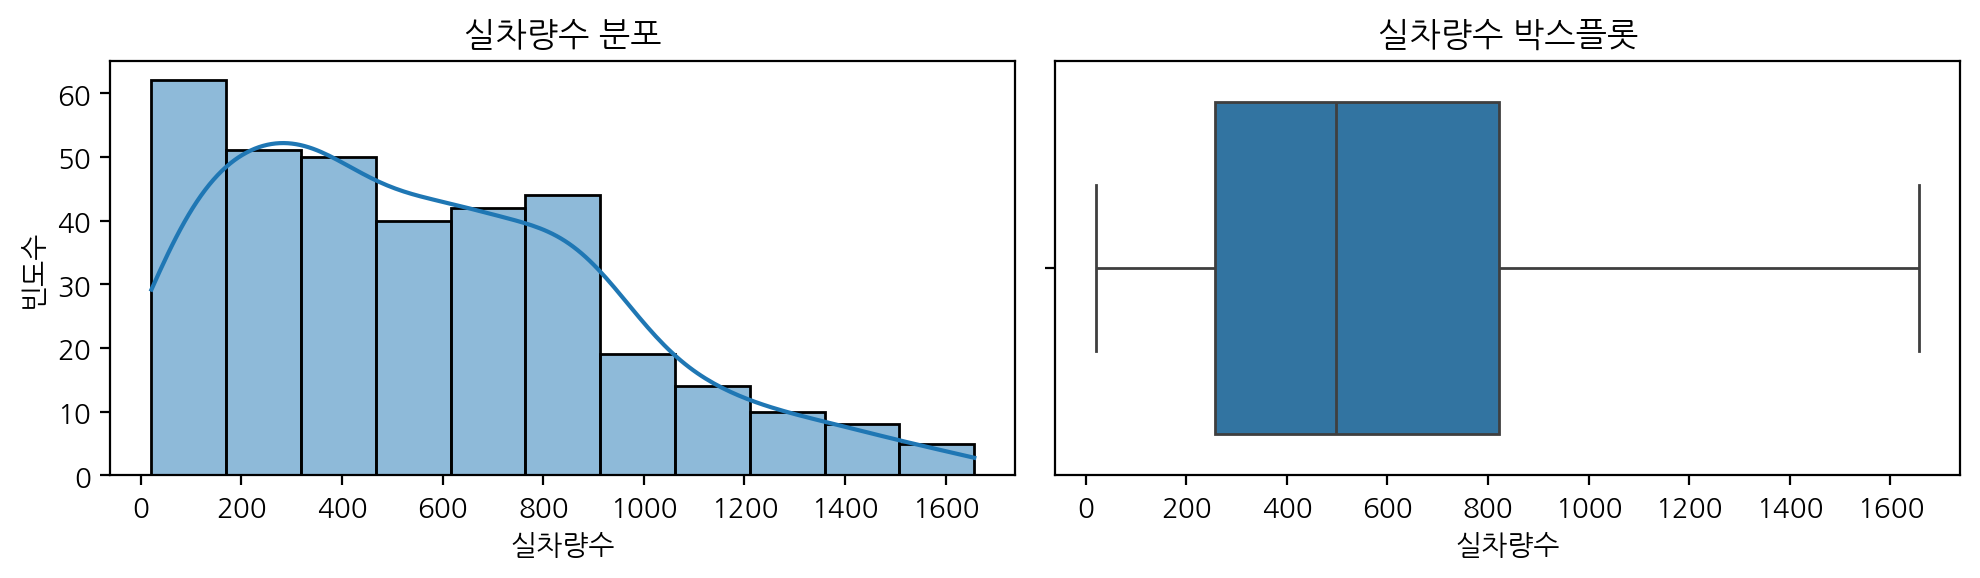

In [177]:
# 각 연속형 변수를 하나씩 정의하고 분석 수행
var1 = '실차량수'
continuous_variable(apart, var1)

## 총세대수

--- 총세대수 기술통계 ---
count     345.000000
mean      546.759420
std       432.359538
min         1.000000
25%       178.000000
50%       491.000000
75%       853.000000
max      2289.000000
Name: 총세대수, dtype: float64




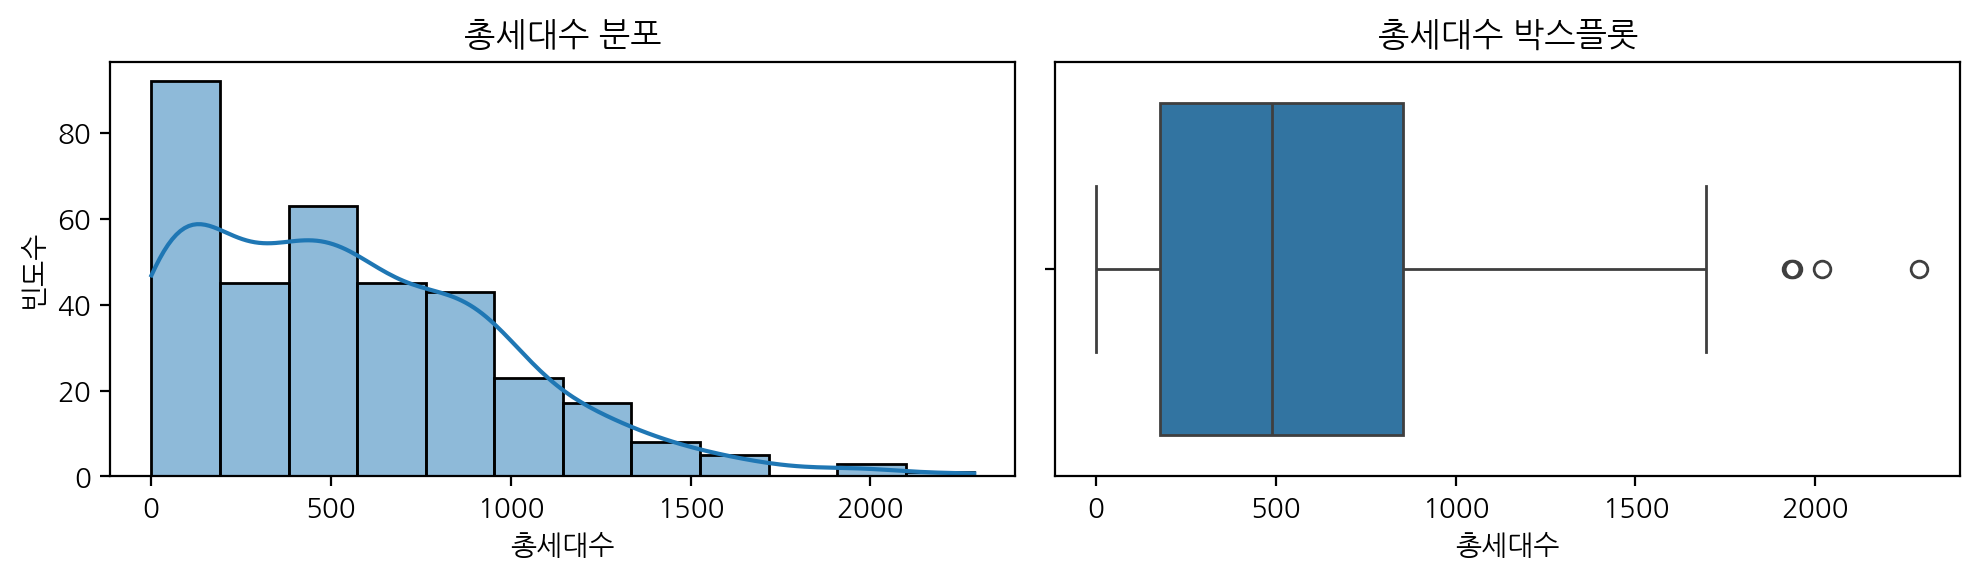

In [179]:
var2 = '총세대수'
continuous_variable(apart, var2)

## 총면적

--- 총면적 기술통계 ---
count       345.000000
mean      37282.661962
std       29588.197927
min          68.930000
25%       11293.832100
50%       32190.360000
75%       56189.979600
max      150126.863200
Name: 총면적, dtype: float64




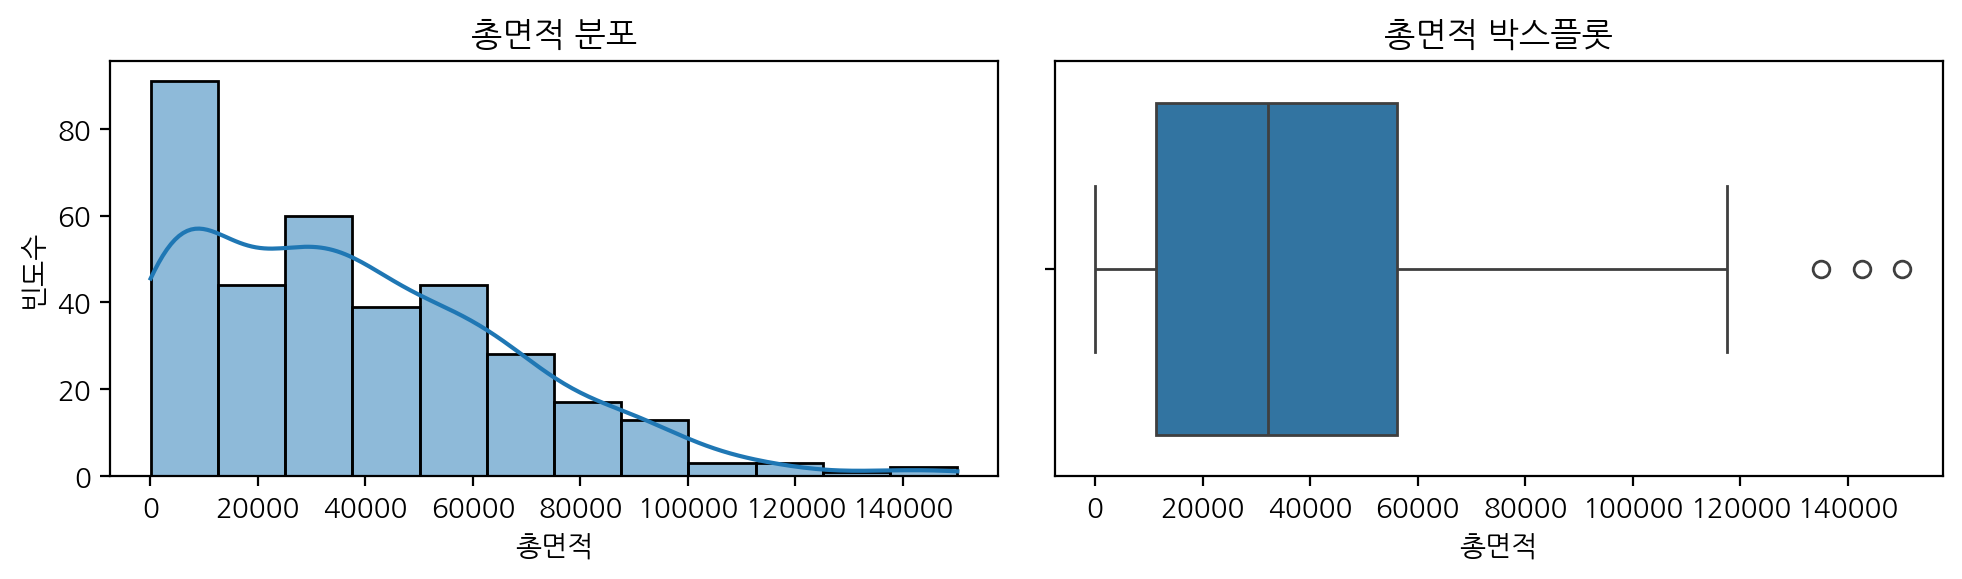

In [181]:
var3 = '총면적'
continuous_variable(apart, var3)

## 준공연도

--- 준공연도 기술통계 ---
count     345.000000
mean     2007.713043
std         7.261036
min      1992.000000
25%      2003.000000
50%      2008.000000
75%      2013.000000
max      2022.000000
Name: 준공연도, dtype: float64




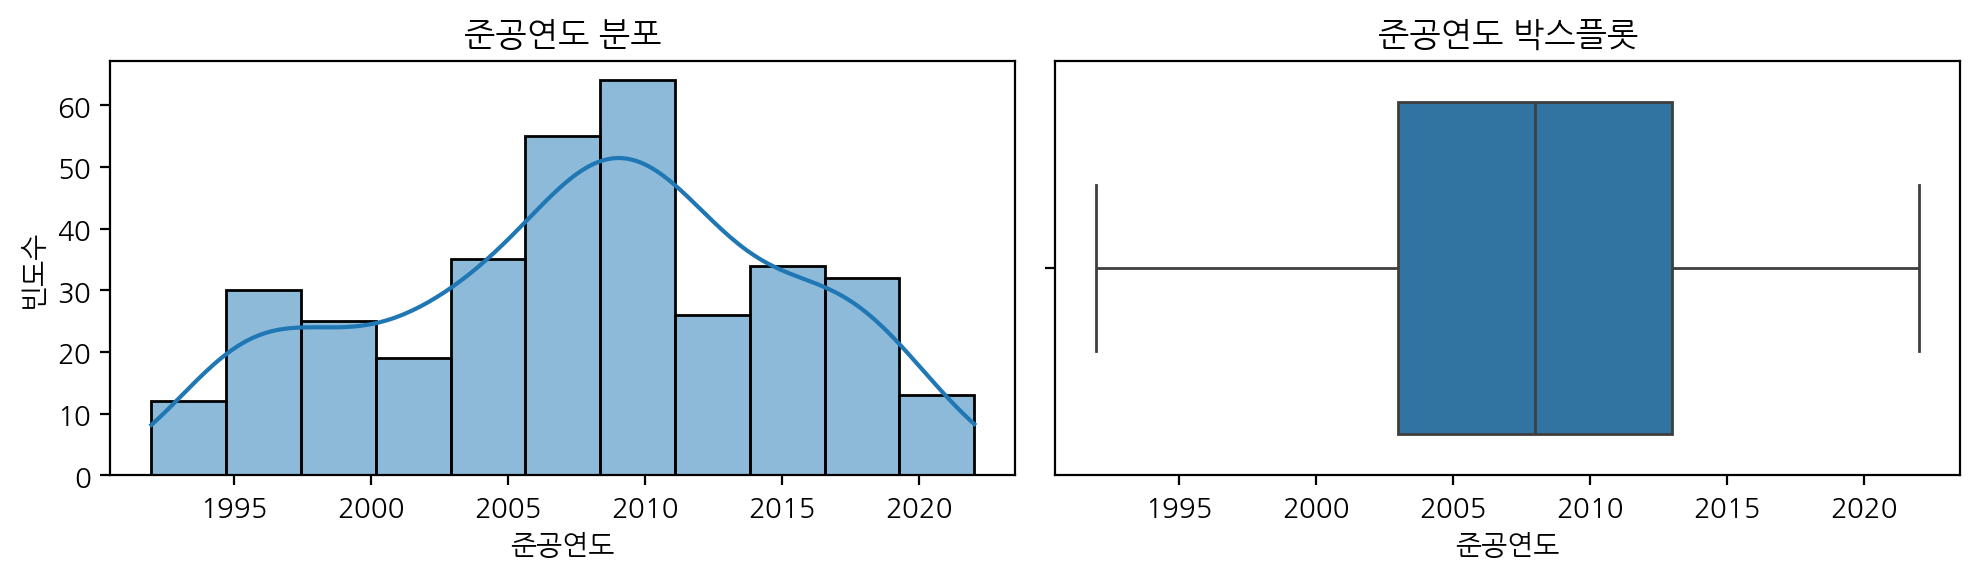

In [184]:
var4 = '준공연도'
continuous_variable(apart, var4)

## 임대료

--- 임대료 기술통계 ---
count       345.000000
mean     197729.050210
std      158760.777669
min           0.000000
25%      112905.000000
50%      172000.000000
75%      227564.000000
max      950305.000000
Name: 임대료, dtype: float64




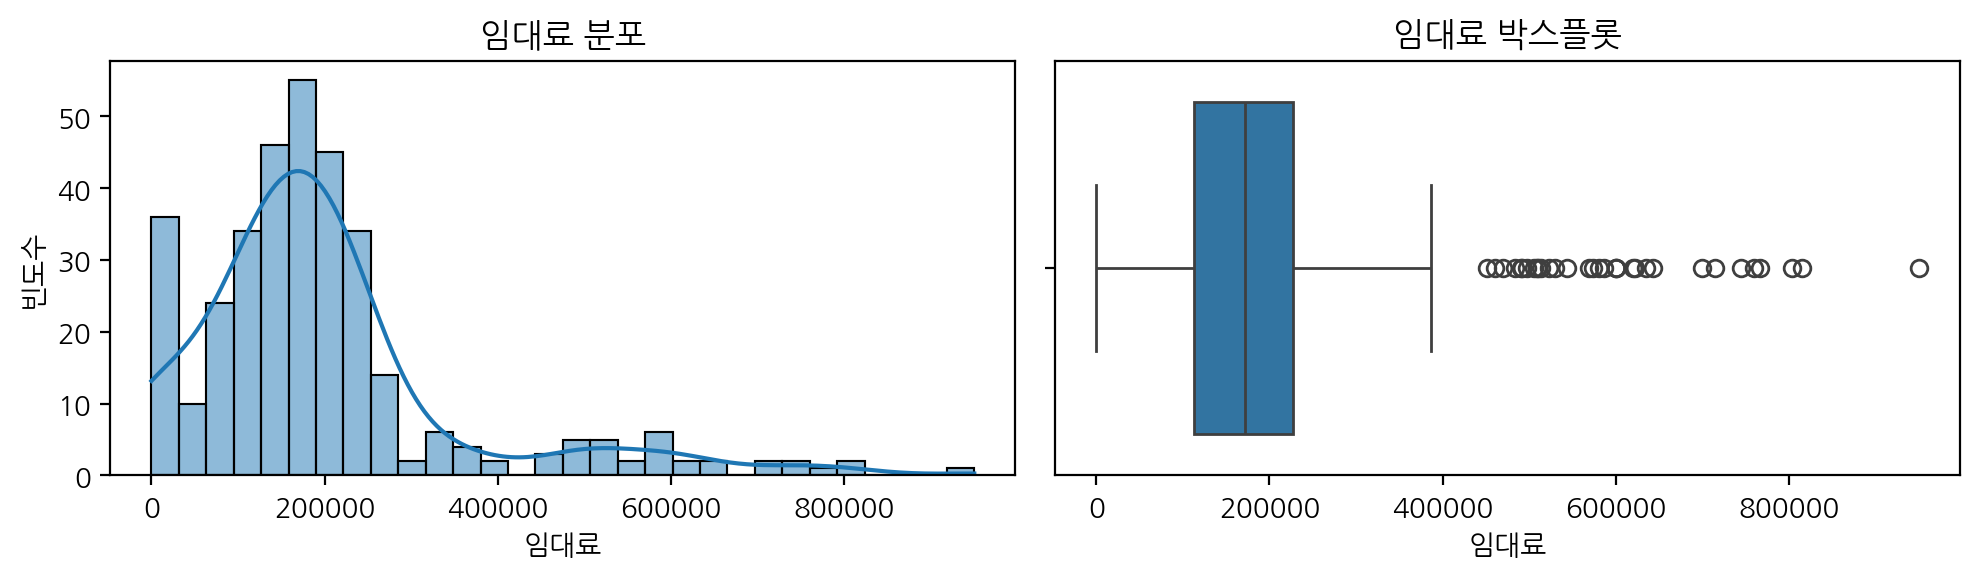

In [186]:
var5 = '임대료'
continuous_variable(apart, var5)

## 임대보증금

--- 임대보증금 기술통계 ---
count    3.450000e+02
mean     2.382737e+07
std      2.247481e+07
min      0.000000e+00
25%      1.272491e+07
50%      1.930850e+07
75%      2.837700e+07
max      1.898219e+08
Name: 임대보증금, dtype: float64




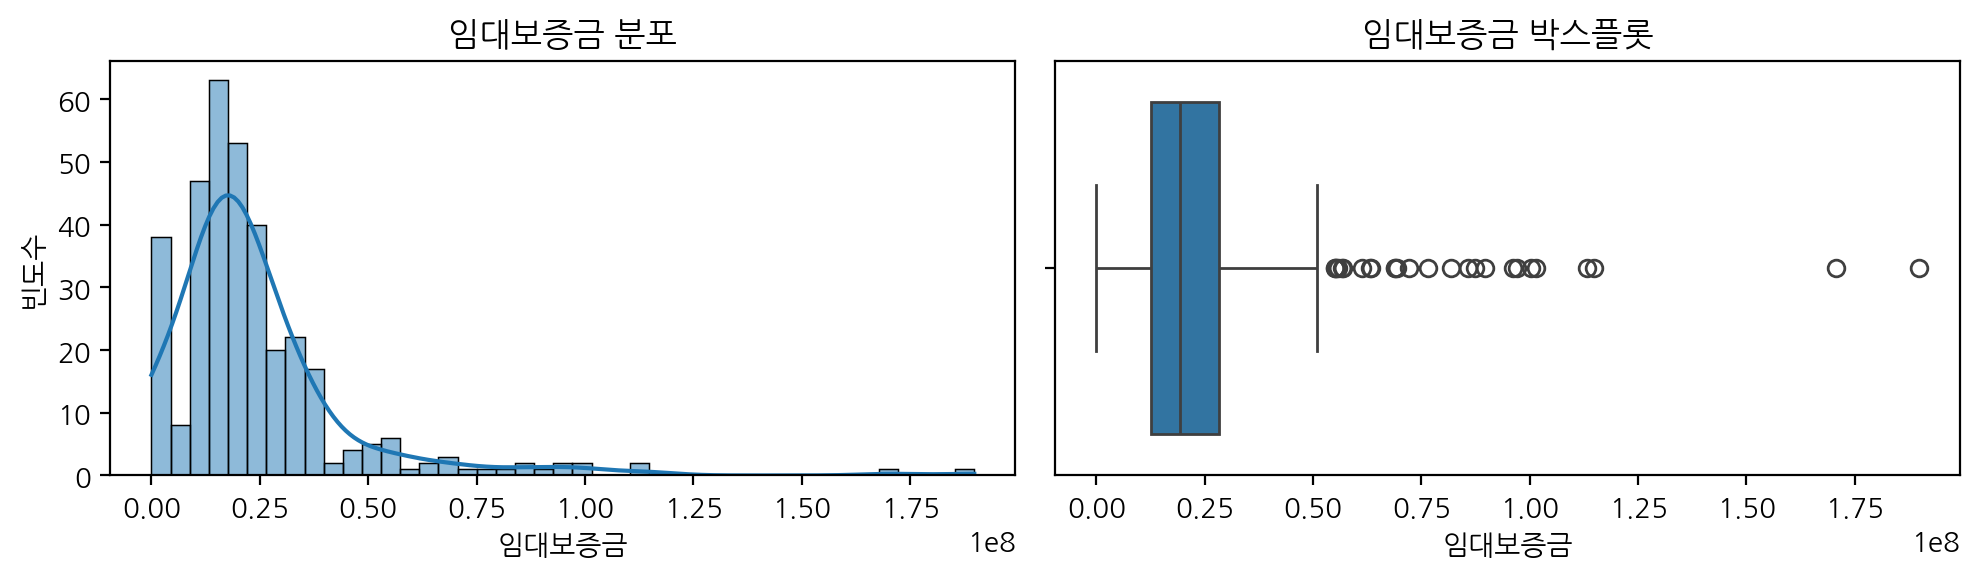

In [188]:
var6 = '임대보증금'
continuous_variable(apart, var6)

### (2) 범주형 변수

- 대상: '지역', '건물형태', '난방방식', '승강기설치여부'
- sns.countplot() 함수 등을 사용해 데이터 분포를 확인합니다.
- 반복되는 코드는 함수를 만들어 사용하면 편리합니다.

In [191]:
import seaborn as sns
import matplotlib.pyplot as plt

def categorical_variable(data, var):
        plt.rcParams["figure.figsize"]=(10,3) #모든 그래프를 해당 크기로 고정
    
        sns.countplot(data=data, x=var, order=data[var].value_counts().index)
        plt.title(f'{var} 빈도수')
        plt.xticks(rotation=45)
        plt.xlabel(var)
        plt.ylabel('빈도수')
        plt.tight_layout()
        plt.show()


#### 1) 지역

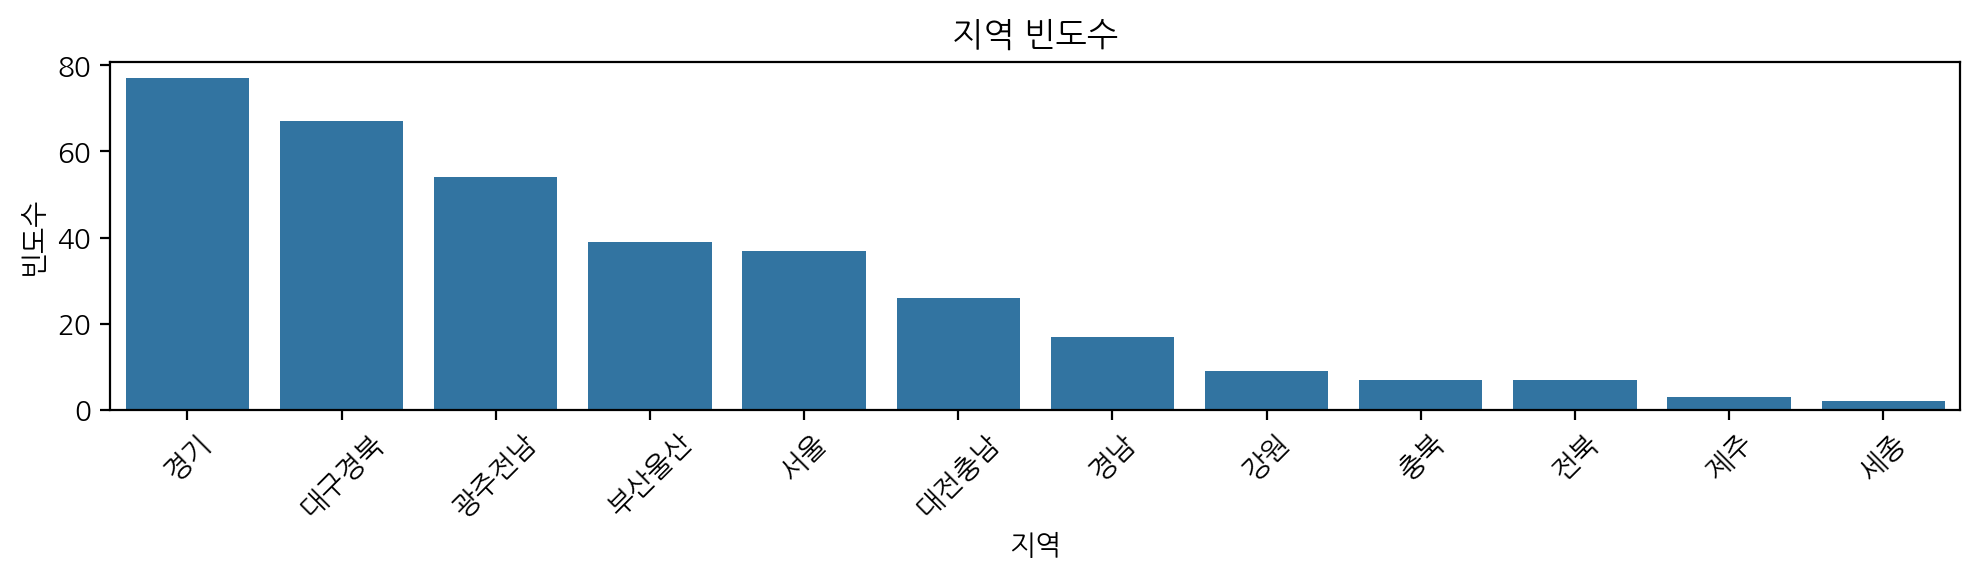

In [193]:
var1 = '지역'
categorical_variable(apart,var1)

#### 2) 건물형태

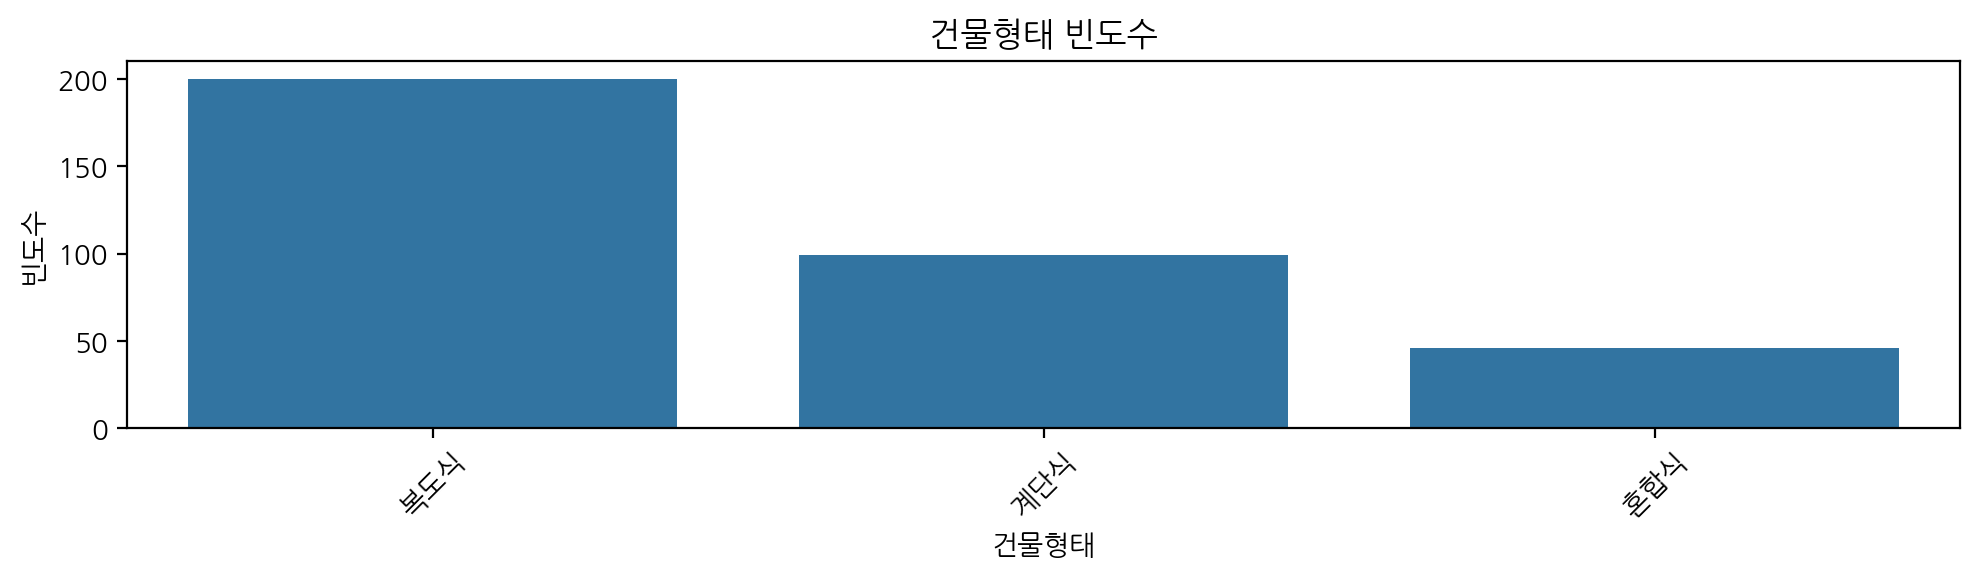

In [195]:
var1 = '건물형태'
categorical_variable(apart,var1)

#### 3) 난방방식

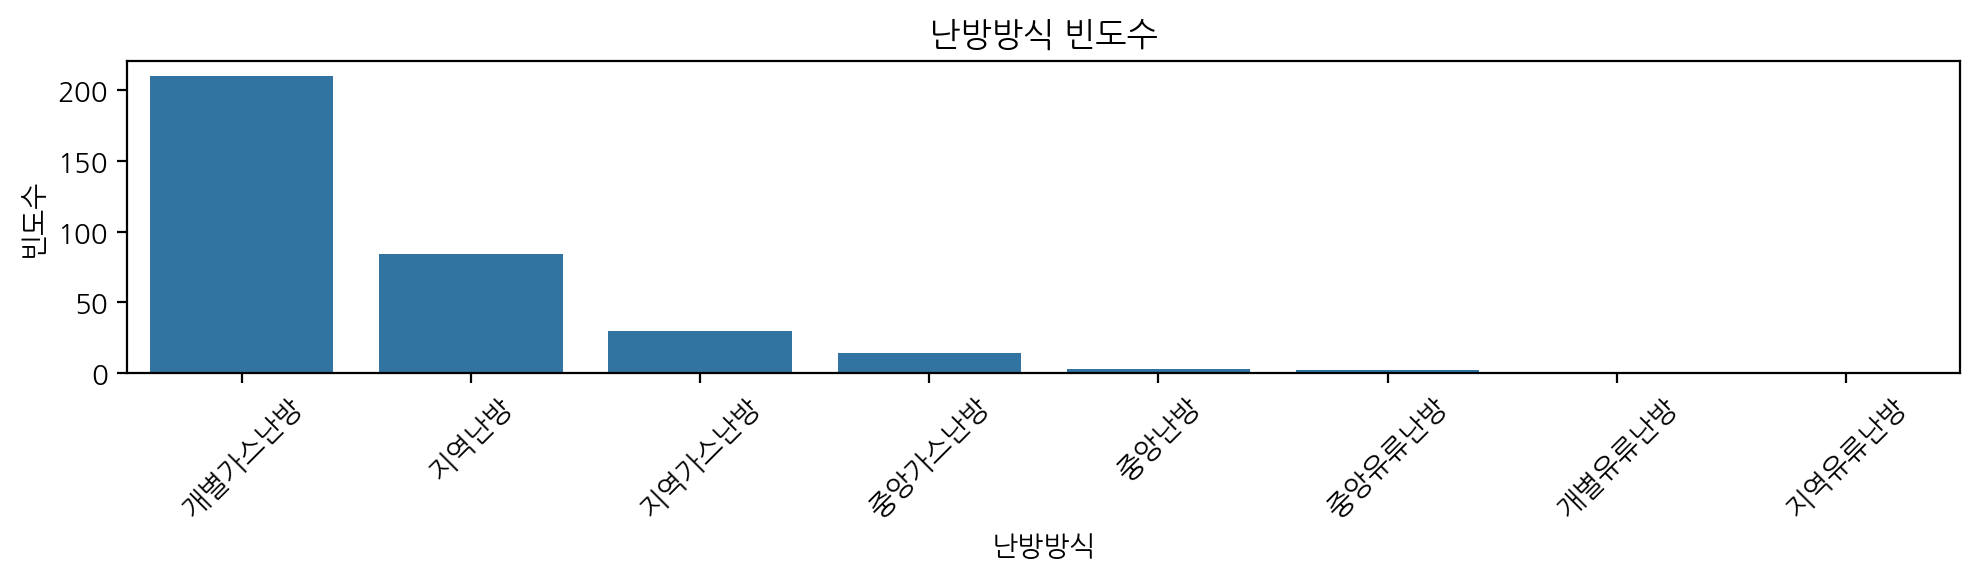

In [198]:
var1 = '난방방식'
categorical_variable(apart,var1)

#### 4) 승강기설치여부

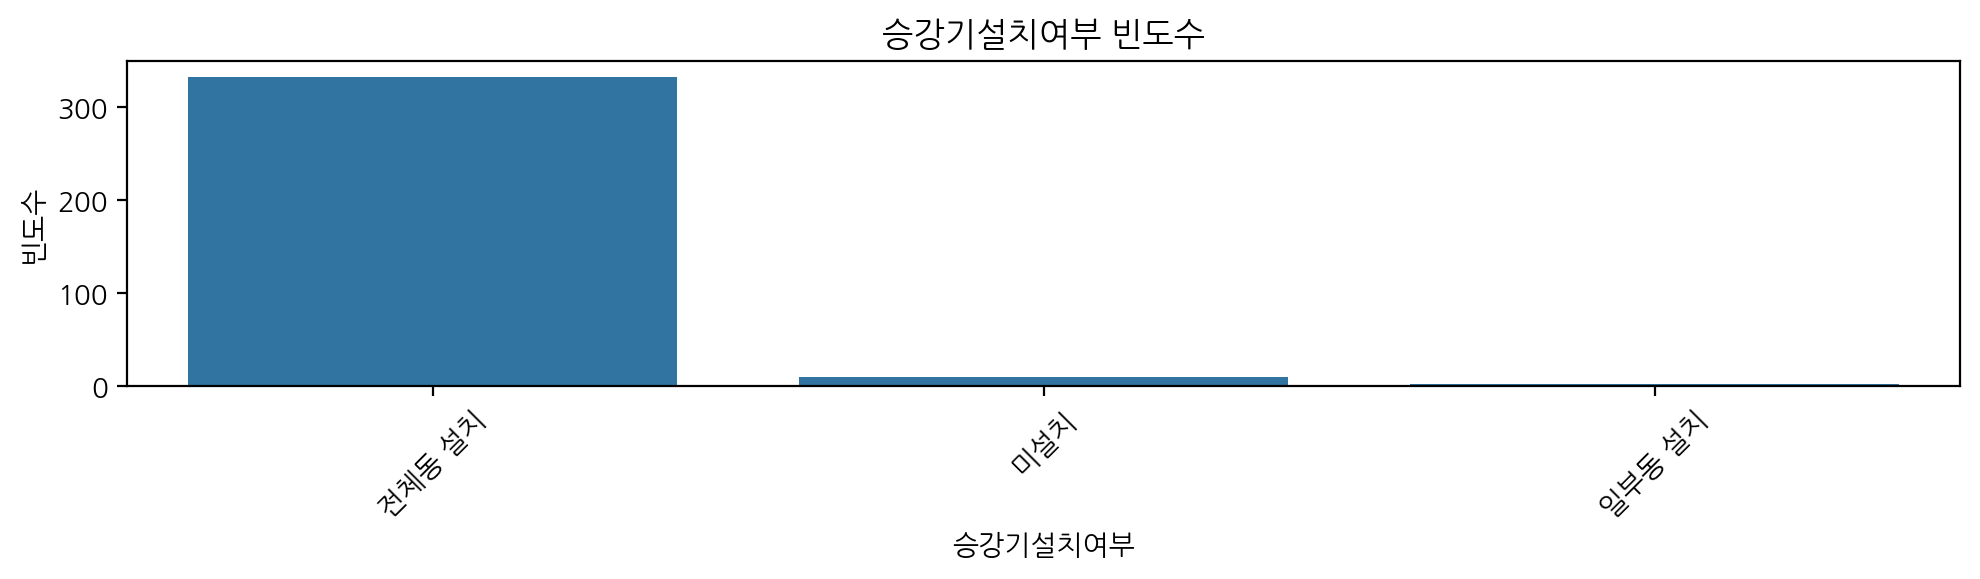

In [200]:
var1 = '승강기설치여부'
categorical_variable(apart,var1)

#### 5) 전용면적구간

- 전용면적구간은 pd.melt() 함수를 사용해 pivot을 해제하여 전용면적구간별 세대수를 분석합니다.

In [202]:
# pd.melt()로 피벗 해제
melted_data = pd.melt(apart, id_vars=['단지코드'], 
                       value_vars=['10-30', '30-40','40-50', '50-60', '60-70', '70-80', '80-200'],
                       var_name='전용면적구간', 
                       value_name='세대수')

# 결과 확인
melted_data.head(300)

,단지코드,전용면적구간,세대수
0,C0001,10-30,0
1,C0002,10-30,35
2,C0003,10-30,0
3,C0004,10-30,0
4,C0006,10-30,15
...,...,...,...
295,C0312,10-30,8
296,C0313,10-30,0
297,C0314,10-30,0
298,C0315,10-30,0


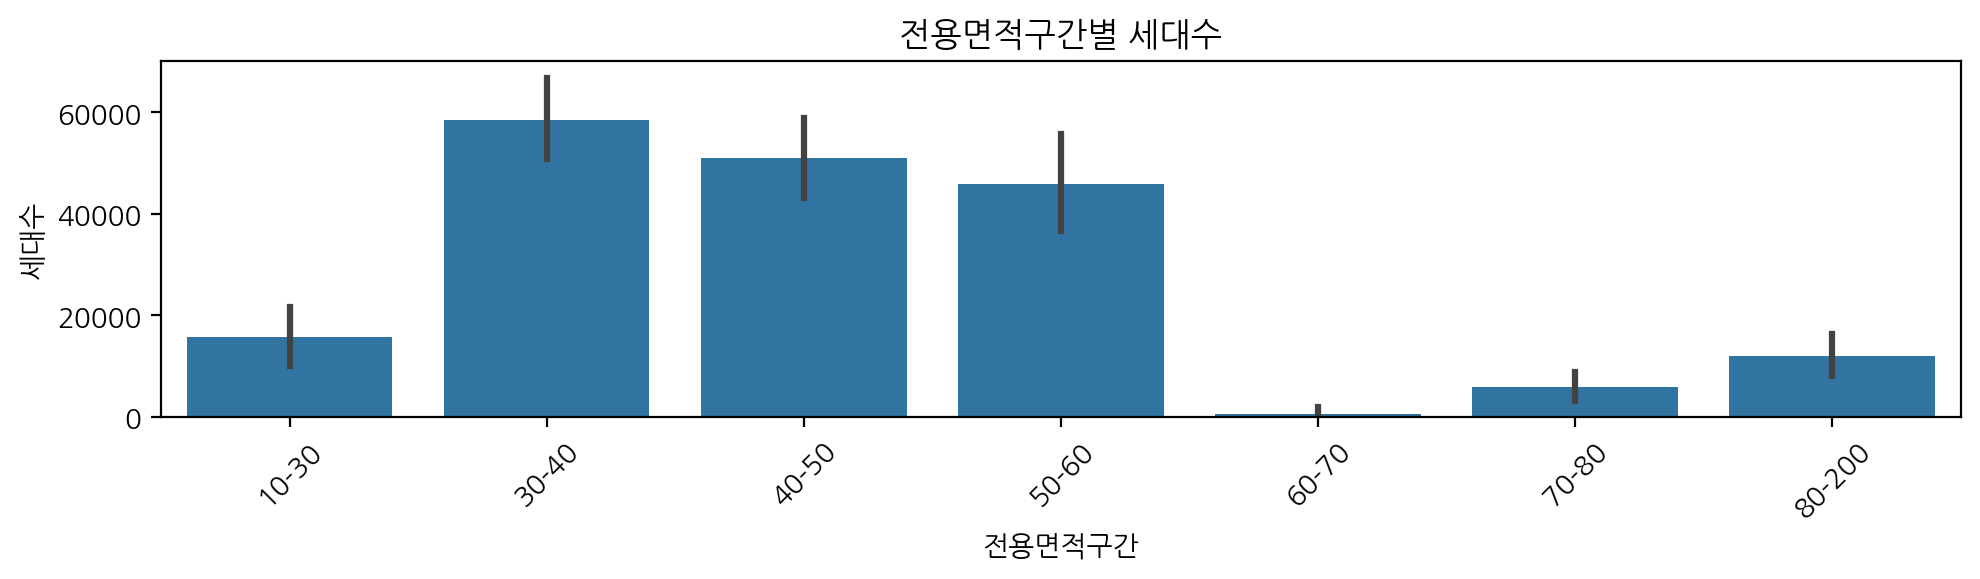

In [203]:
sns.barplot(data=melted_data, x='전용면적구간', y='세대수', estimator=sum)
plt.title('전용면적구간별 세대수')
plt.xlabel('전용면적구간')
plt.ylabel('세대수')
plt.xticks(rotation=45)  # x축 라벨 회전
plt.tight_layout()
plt.show()

## 4. 이변량 분석

- 숫자형 변수들 간의 상관관계를 분석합니다.
- 숫자형 변수 → 실차량수 상관관계를 분석합니다.    
- 볌주형 변수 → 실차량수 관계를 분석합니다.

In [206]:
apart.head()

,단지코드,총세대수,지역,준공연도,건물형태,난방방식,승강기설치여부,실차량수,총면적,10-30,30-40,40-50,50-60,60-70,70-80,80-200,임대보증금,임대료
0,C0001,78,서울,2013,계단식,개별가스난방,전체동 설치,109,6023.7683,0,0,0,78,0,0,0,5.696200e+07,642930.000000
1,C0002,35,서울,2013,복도식,개별가스난방,전체동 설치,35,1569.1668,35,0,0,0,0,0,0,6.306200e+07,470100.000000
2,C0003,88,서울,2013,계단식,개별가스난방,전체동 설치,88,7180.1396,0,0,0,88,0,0,0,7.219000e+07,586540.000000
3,C0004,477,서울,2014,복도식,지역난방,전체동 설치,943,47058.9273,0,0,0,150,0,216,111,1.015167e+08,950305.000000
4,C0006,15,서울,2013,복도식,개별가스난방,전체동 설치,21,543.0268,15,0,0,0,0,0,0,5.522750e+07,340148.333333


### (1) 숫자형 변수들 간의 상관관계

- 숫자형 변수 → 실차량수 상관관계를 분석합니다.    
- 숫자형 변수들 간의 상관관계를 df.corr() 메서드와 sns.heatmap() 함수 등을 사용해 시각화 합니다.

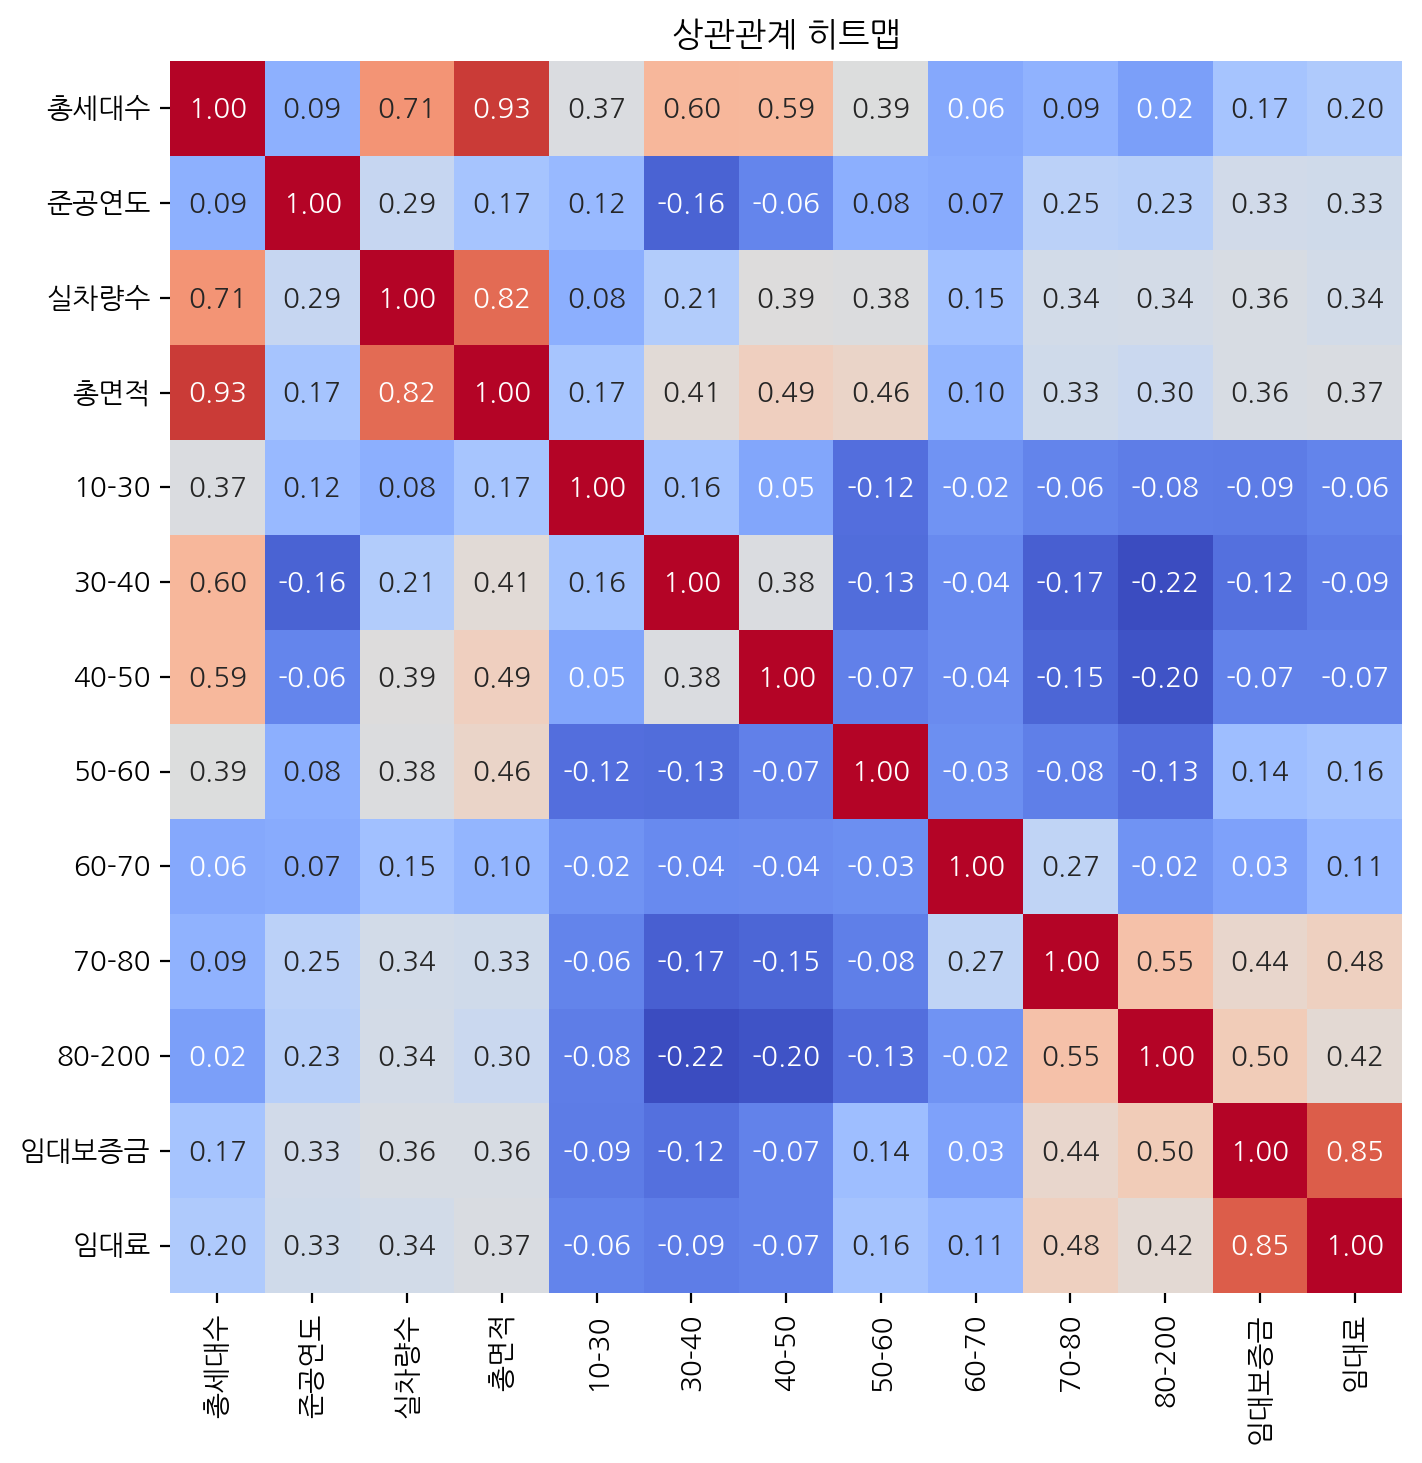

실차량수와 다른 변수 간의 상관관계:
실차량수      1.000000
총면적       0.822183
총세대수      0.712475
40-50     0.392055
50-60     0.381746
임대보증금     0.361867
80-200    0.340284
70-80     0.339168
임대료       0.337066
준공연도      0.287266
30-40     0.211912
60-70     0.151615
10-30     0.077284
Name: 실차량수, dtype: float64


In [209]:
import seaborn as sns
import matplotlib.pyplot as plt

# 숫자형 변수 리스트
numerical_vars = apart.select_dtypes(include=['number']).columns.tolist()

# 숫자형 변수들로 구성된 데이터프레임 생성
numerical_data = apart[numerical_vars]

# 상관계수 행렬 계산
correlation_matrix = numerical_data.corr()

# '실차량수'와 다른 변수 간의 상관관계 확인
correlation_with_target = correlation_matrix['실차량수'].sort_values(ascending=False)

# 상관계수 행렬 시각화
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, 
            annot=True, fmt=".2f", 
            cbar=False,
            cmap='coolwarm', 
            square=True)
plt.title('상관관계 히트맵')
plt.show()

# '실차량수'와의 상관관계 출력
print("실차량수와 다른 변수 간의 상관관계:")
print(correlation_with_target)


### (2) 숫자형 변수 → 실차량수

- 상관계수가 높은 상위 3~5개 숫자형 변수와 실차량수 관계를 산점도를 시각화해 분석합니다.
- 반복되는 코드는 함수를 만들어 사용하면 편리합니다.

In [211]:
def correlation_scatter(data, target_var, variable):
    
    sns.scatterplot(data=data, x=target_var, y=variable, alpha=0.6)  # x에 실차량수, y에 변수
    plt.title(f'{target_var} vs {variable}')  # 제목 변경
    plt.xlabel(target_var)  # x축 레이블
    plt.ylabel(variable)     # y축 레이블을 변수명으로 설정
    plt.axvline(x=data[target_var].mean(), color='r', linestyle='--', label=f'{target_var} 평균')  # 평균선 추가
    plt.legend()
    plt.tight_layout()
    plt.show()

In [212]:
# 상관계수가 높은 변수 리스트
high_corr_vars = ['총면적', '총세대수', '40-60', '임대보증금', '60-80']

#### 1) 총면적

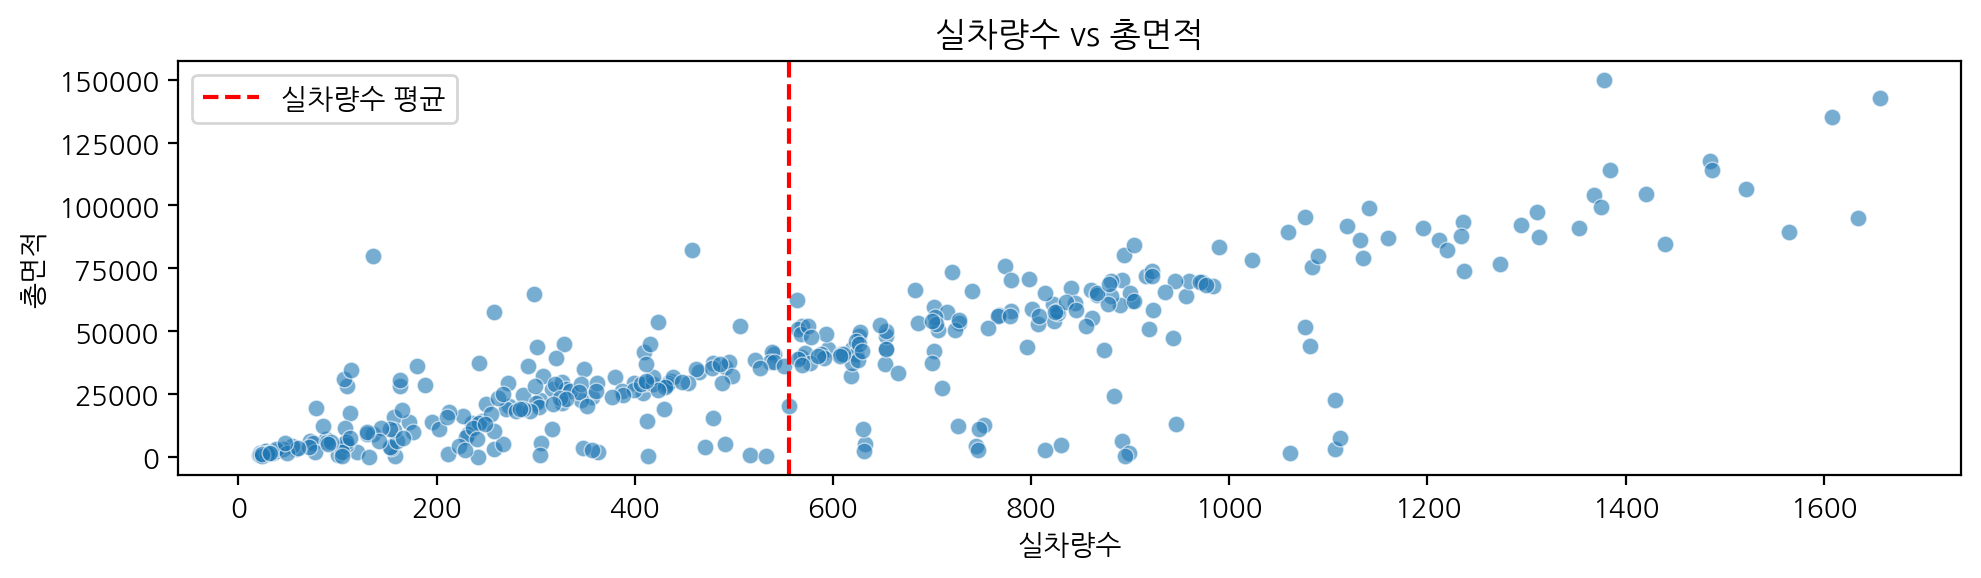

In [214]:
high_corr_vars = '총면적'
correlation_scatter(apart, '실차량수', high_corr_vars)

#### 2) 총세대수

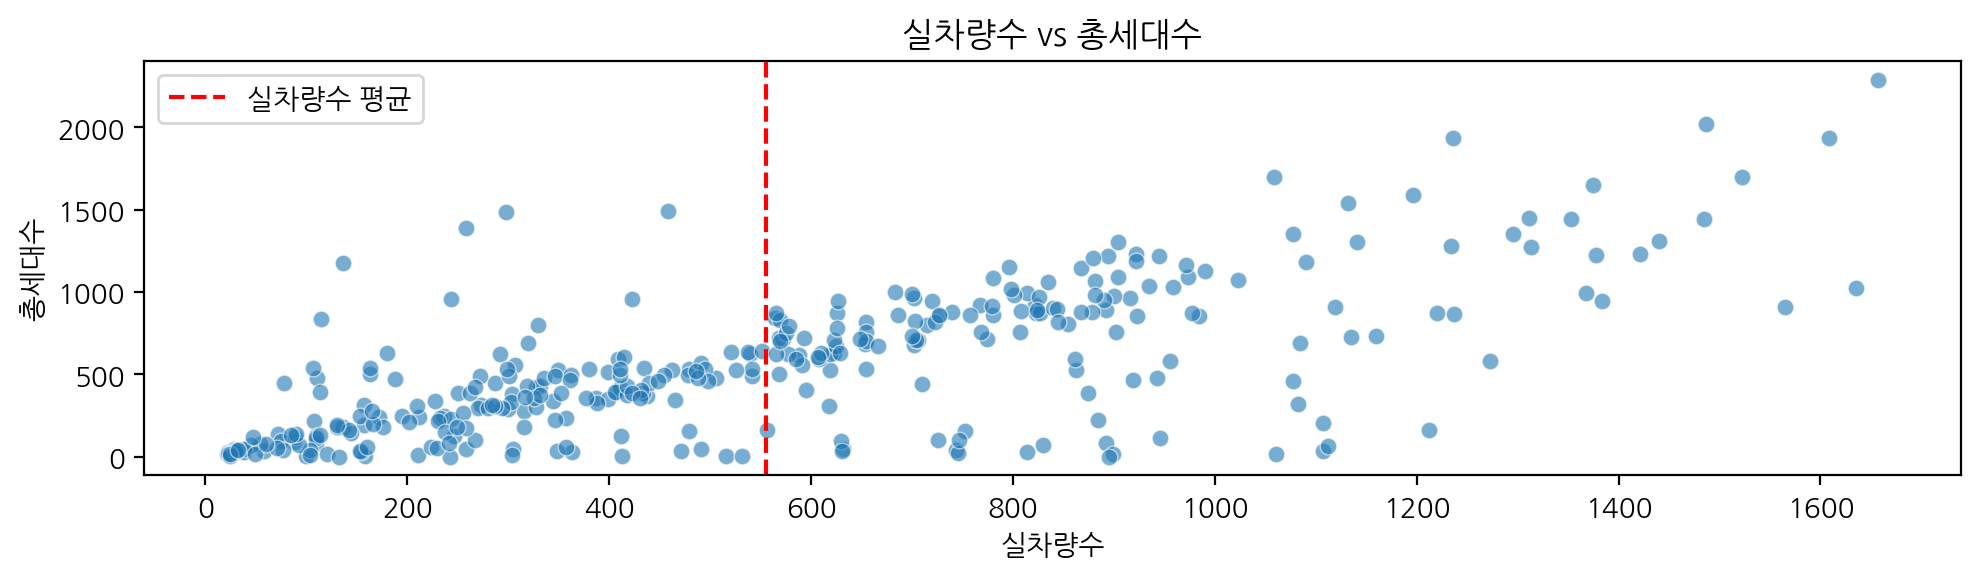

In [218]:
high_corr_vars = '총세대수'
correlation_scatter(apart, '실차량수', high_corr_vars)

#### 3) 40-50

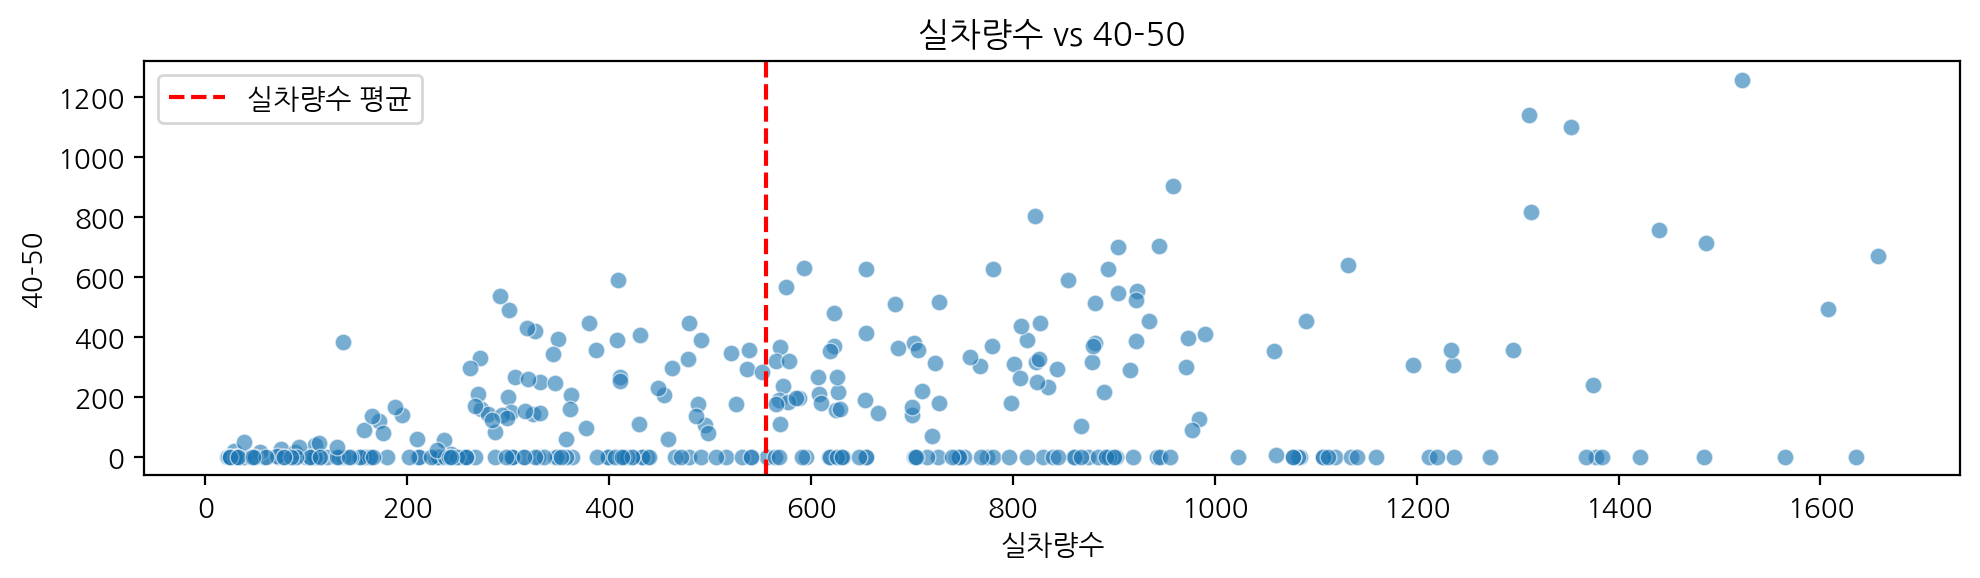

In [220]:
high_corr_vars = '40-50'
correlation_scatter(apart, '실차량수', high_corr_vars)

#### 4) 임대보증금

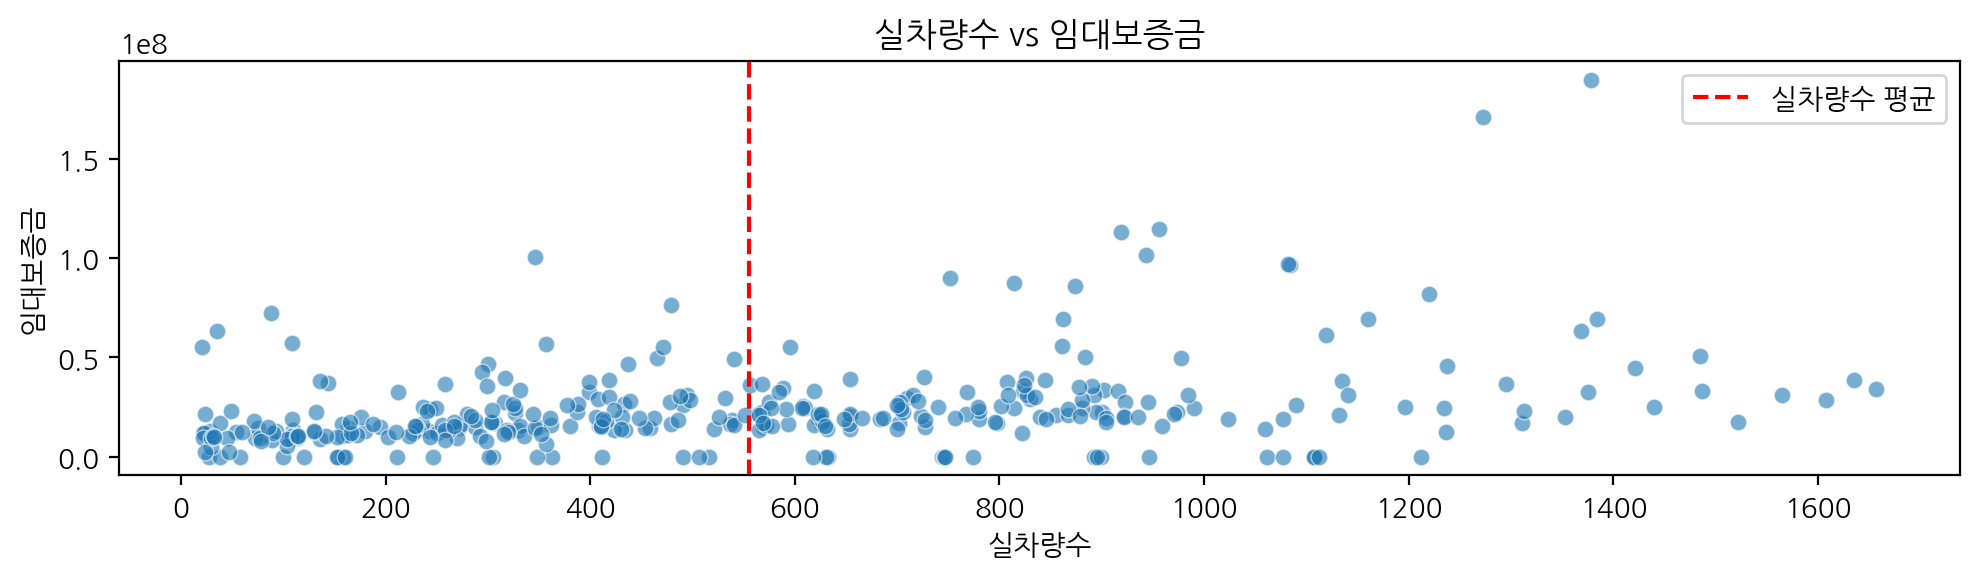

In [235]:
high_corr_vars = '임대보증금'
correlation_scatter(apart, '실차량수', high_corr_vars)

#### 5) 50-60

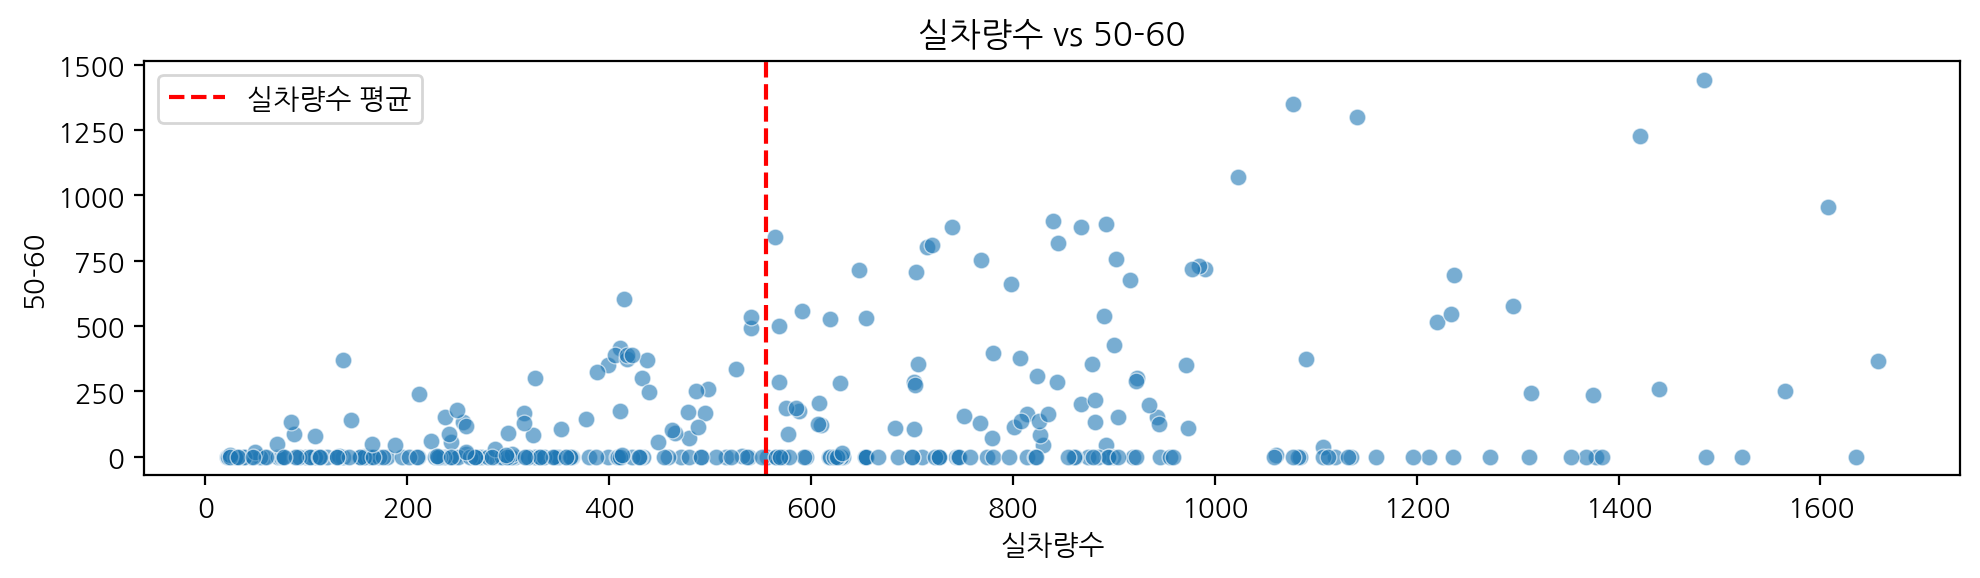

In [237]:
high_corr_vars = '50-60'
correlation_scatter(apart, '실차량수', high_corr_vars)

### (3) 범주형 변수 → 실차량수

- 범주형 변수 → 실차량수 관계를 분석합니다.
- 대상: '지역', '준공연도', '건물형태', '난방방식', '승강기설치여부'
- 범줏값 별 실차량수 평균을 막대그래프로 시각화해 분석합니다.
- 반복되는 코드는 함수를 만들어 사용하면 편리합니다.

In [239]:
# 함수 만들기
def categorical_vs_target(data, target_var, categorical_var):
    # 범주형 변수별 평균 실차량수 계산
    mean_values = data.groupby(categorical_var)[target_var].mean().reset_index()

    # 막대그래프 시각화
    sns.barplot(data=mean_values, x=target_var, y=categorical_var, palette='viridis')
    plt.title(f'{categorical_var} 별 평균 {target_var} 시각화')
    plt.xlabel(f'평균 {target_var}')
    plt.ylabel(categorical_var)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

#### 1) 지역

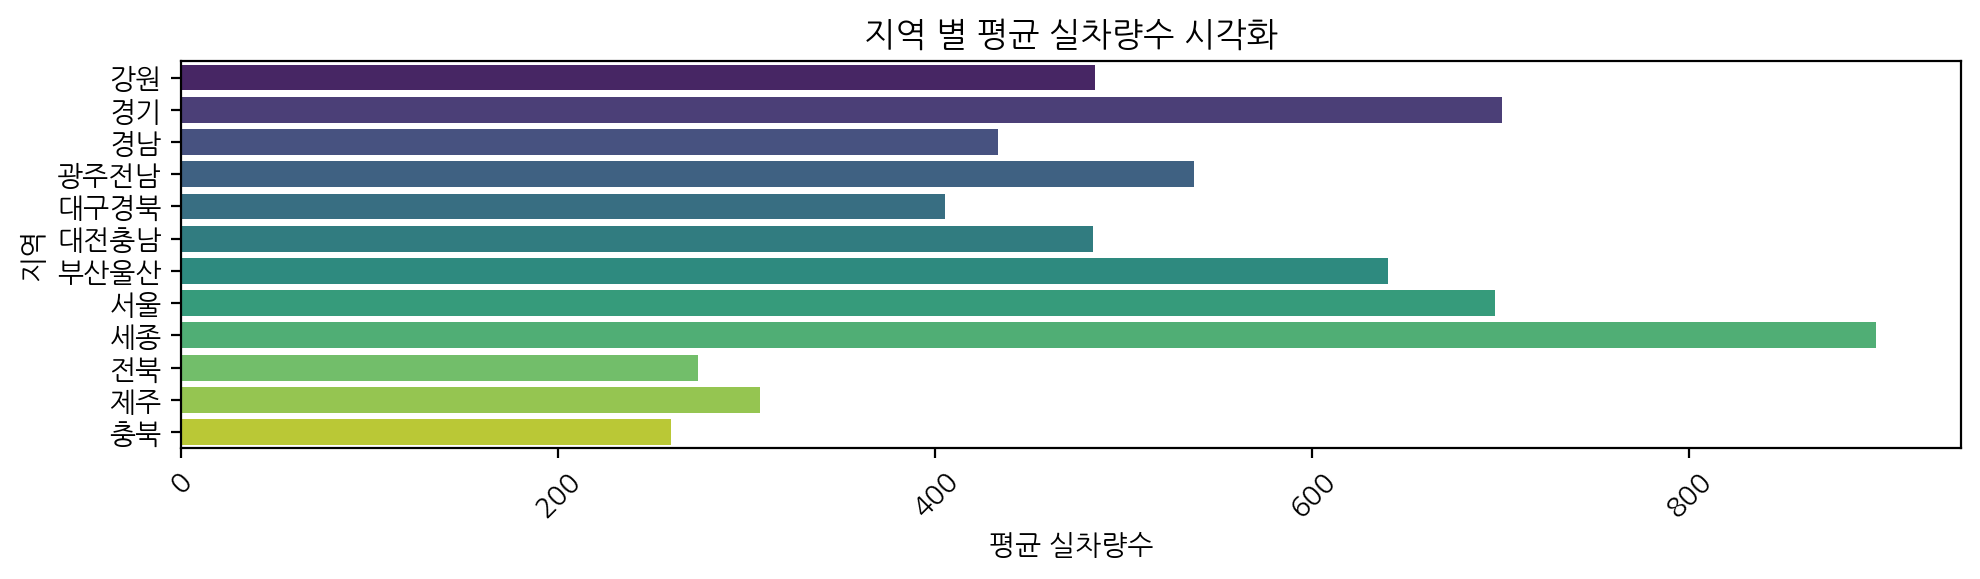

In [244]:
categorical_var = '지역'
categorical_vs_target(apart, '실차량수', categorical_var)

세종>경기>서울 순

#### 2) 준공연도

준공연도는 연속형 범주아닌가? 단변량 때는 연속형으로 분석했는데..여기서는 왜 범주형이지?

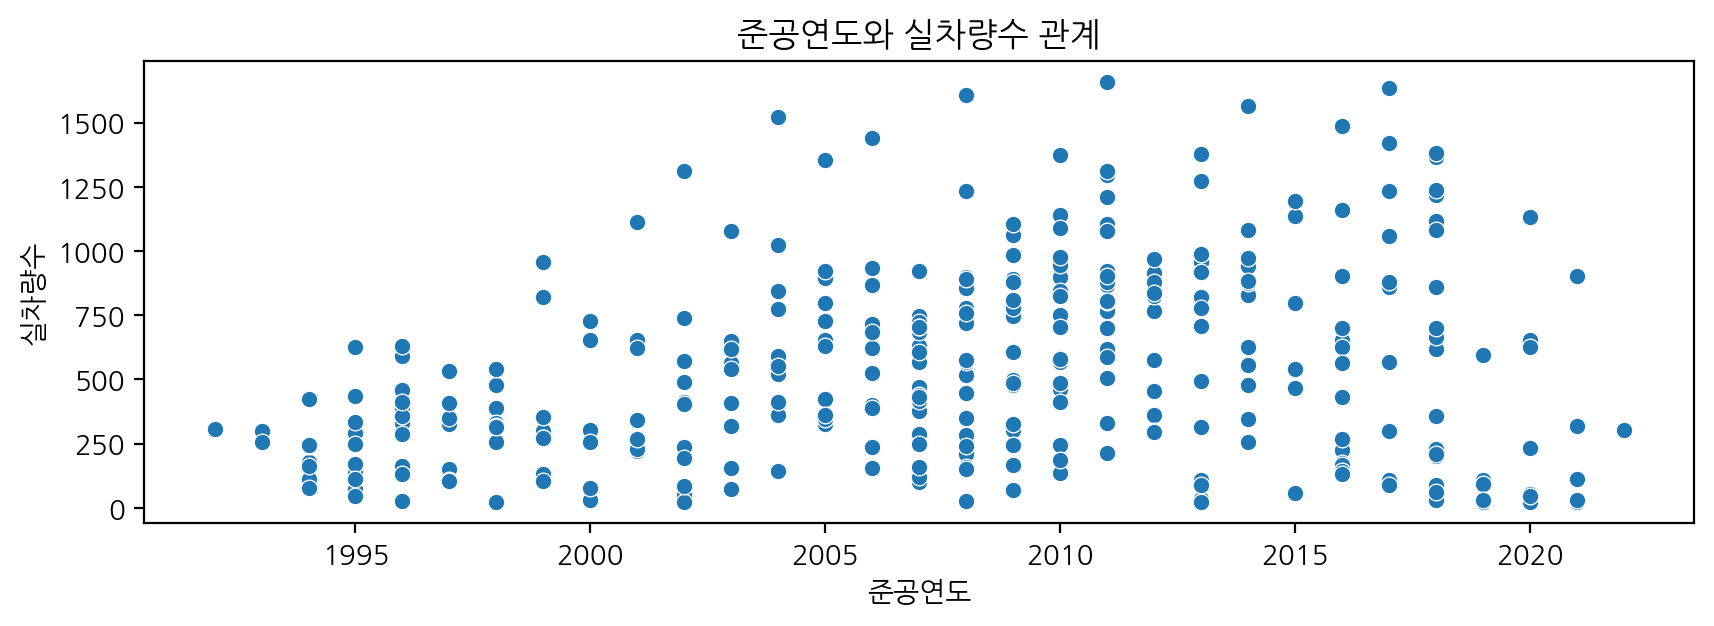

In [249]:
sns.scatterplot(x=apart['준공연도'], y=apart['실차량수'])
plt.title('준공연도와 실차량수 관계')
plt.xlabel('준공연도')
plt.ylabel('실차량수')
plt.show()

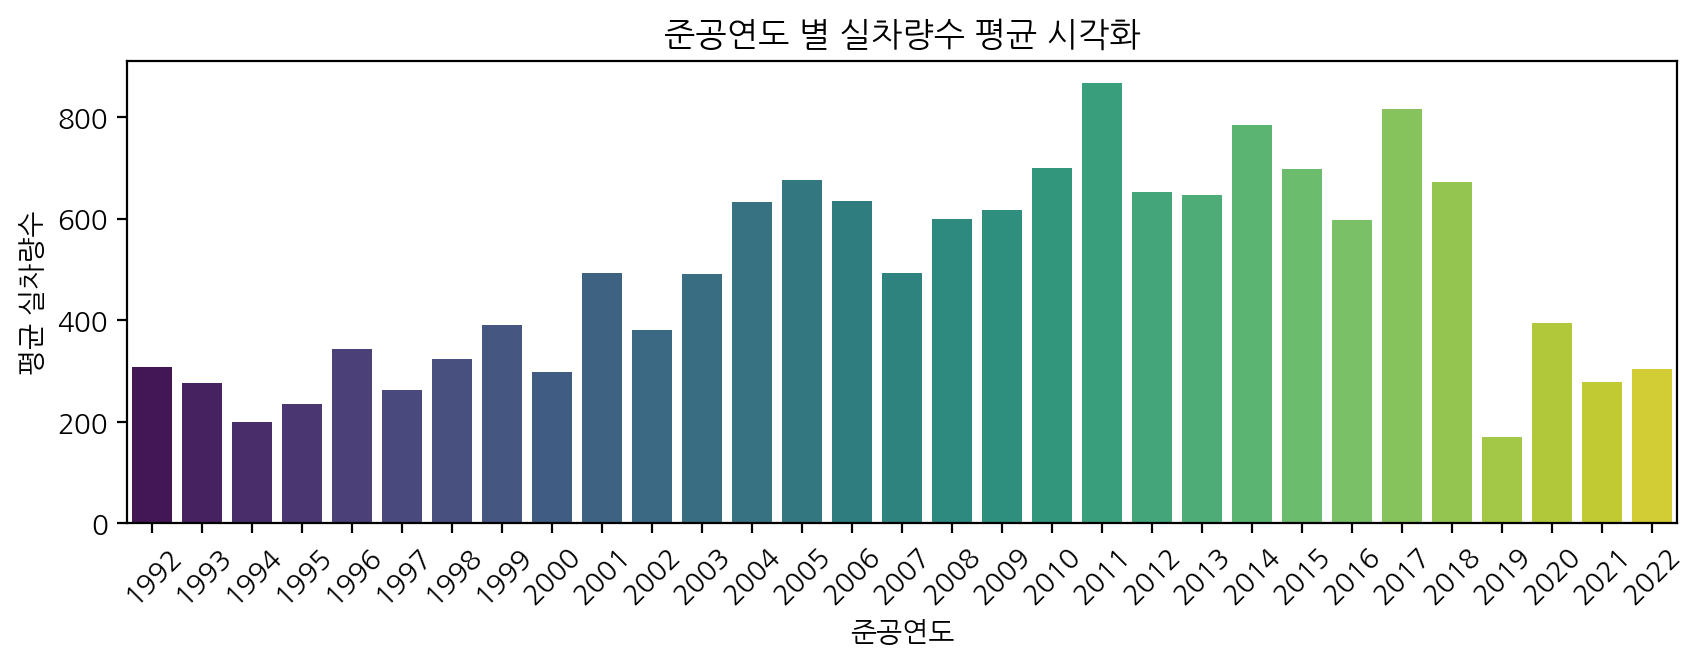

In [250]:
sns.barplot(x='준공연도', y='실차량수', data=apart, ci=None, palette='viridis')
plt.title('준공연도 별 실차량수 평균 시각화')
plt.xlabel('준공연도')
plt.ylabel('평균 실차량수')
plt.xticks(rotation=45)
plt.show()

#### 3) 건물형태

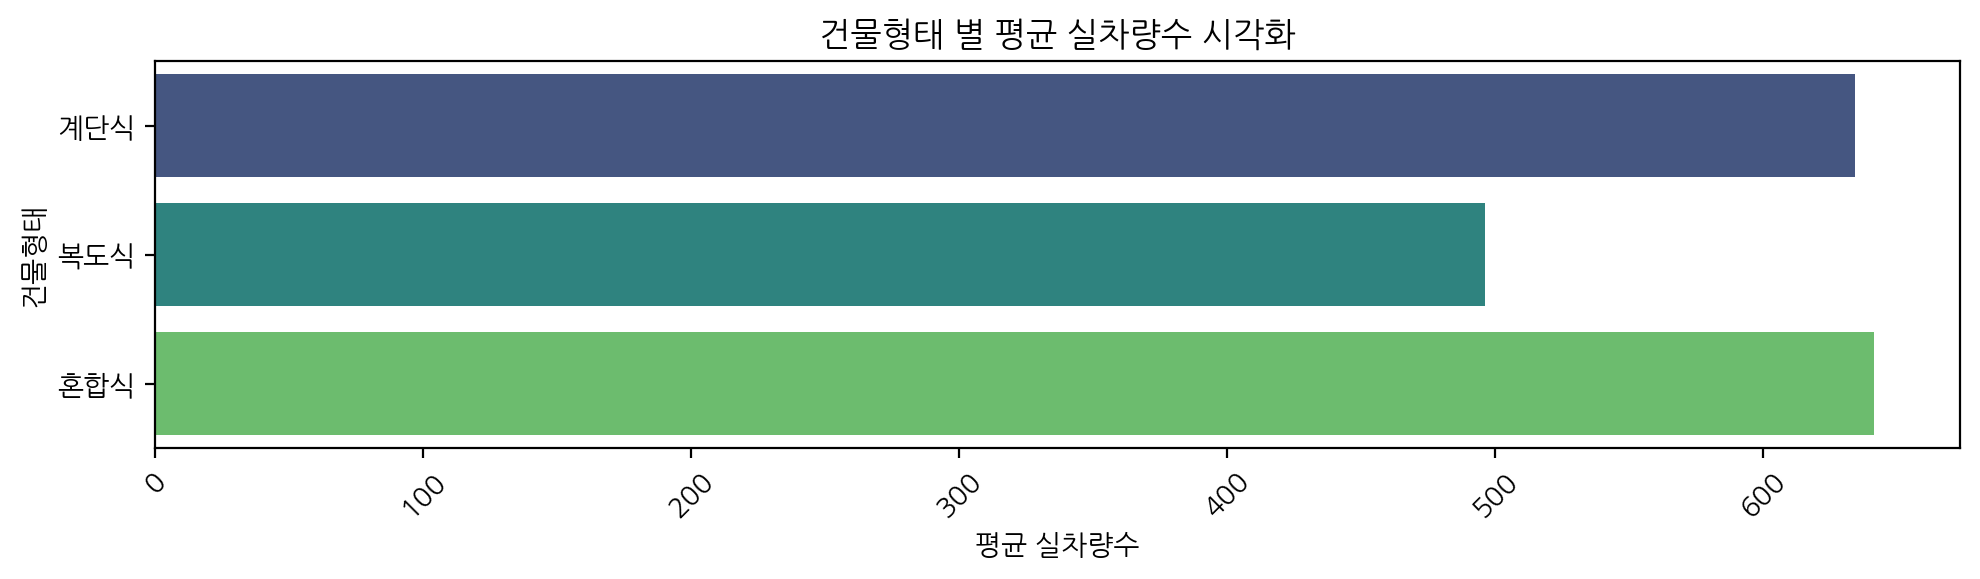

In [254]:
categorical_var = '건물형태'
categorical_vs_target(apart, '실차량수', categorical_var)

#### 4) 난방방식

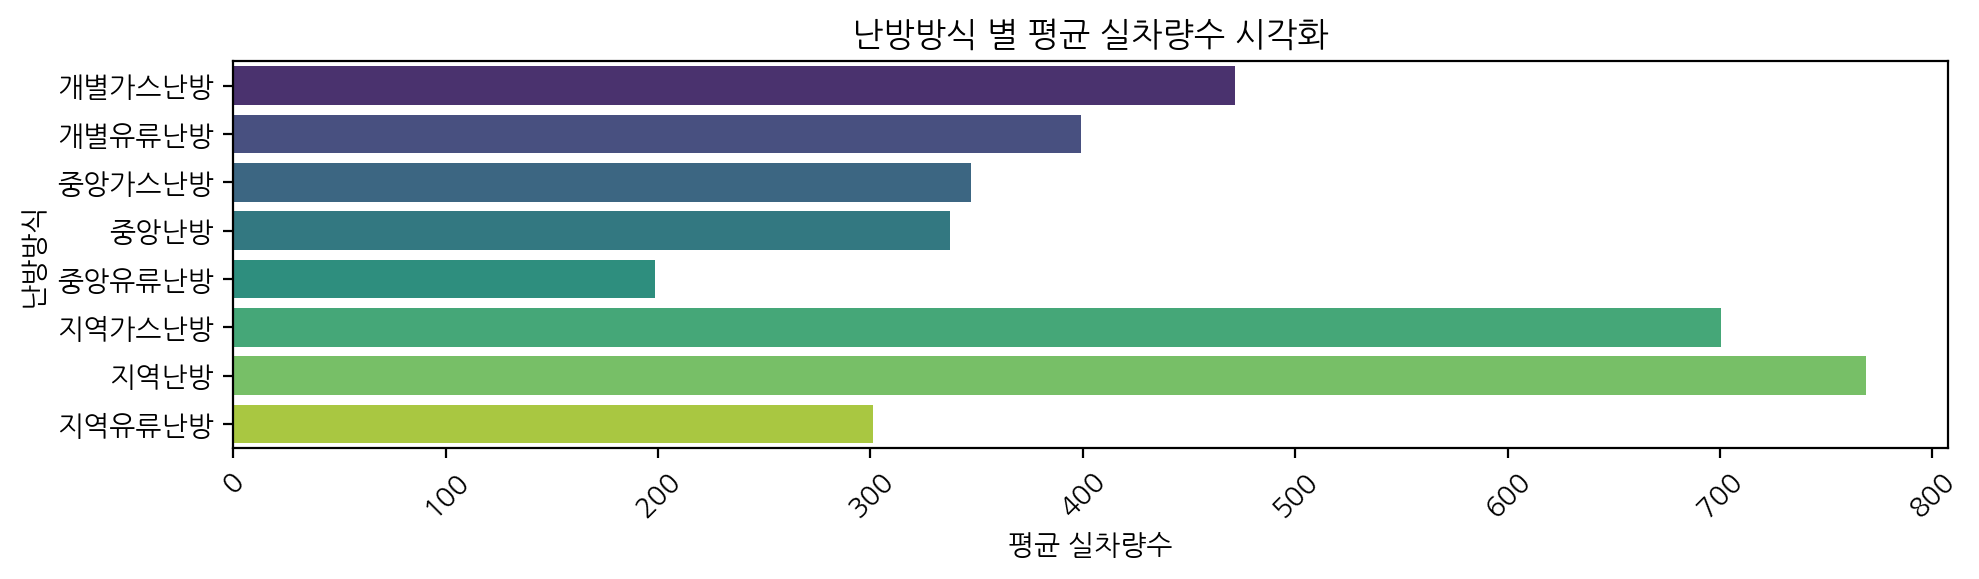

난방방식
지역난방      768.821429
지역가스난방    700.333333
개별가스난방    471.709524
개별유류난방    399.000000
중앙가스난방    347.428571
중앙난방      337.666667
지역유류난방    301.000000
중앙유류난방    198.500000
Name: 실차량수, dtype: float64


In [257]:
categorical_var = '난방방식'
categorical_vs_target(apart, '실차량수', categorical_var)
# 범주형 변수인 난방방식에 따른 실차량수의 평균을 구하고 내림차순으로 정렬
result = apart.groupby(categorical_var)['실차량수'].mean().sort_values(ascending=False)

print(result)

#### 5) 승강기설치여부

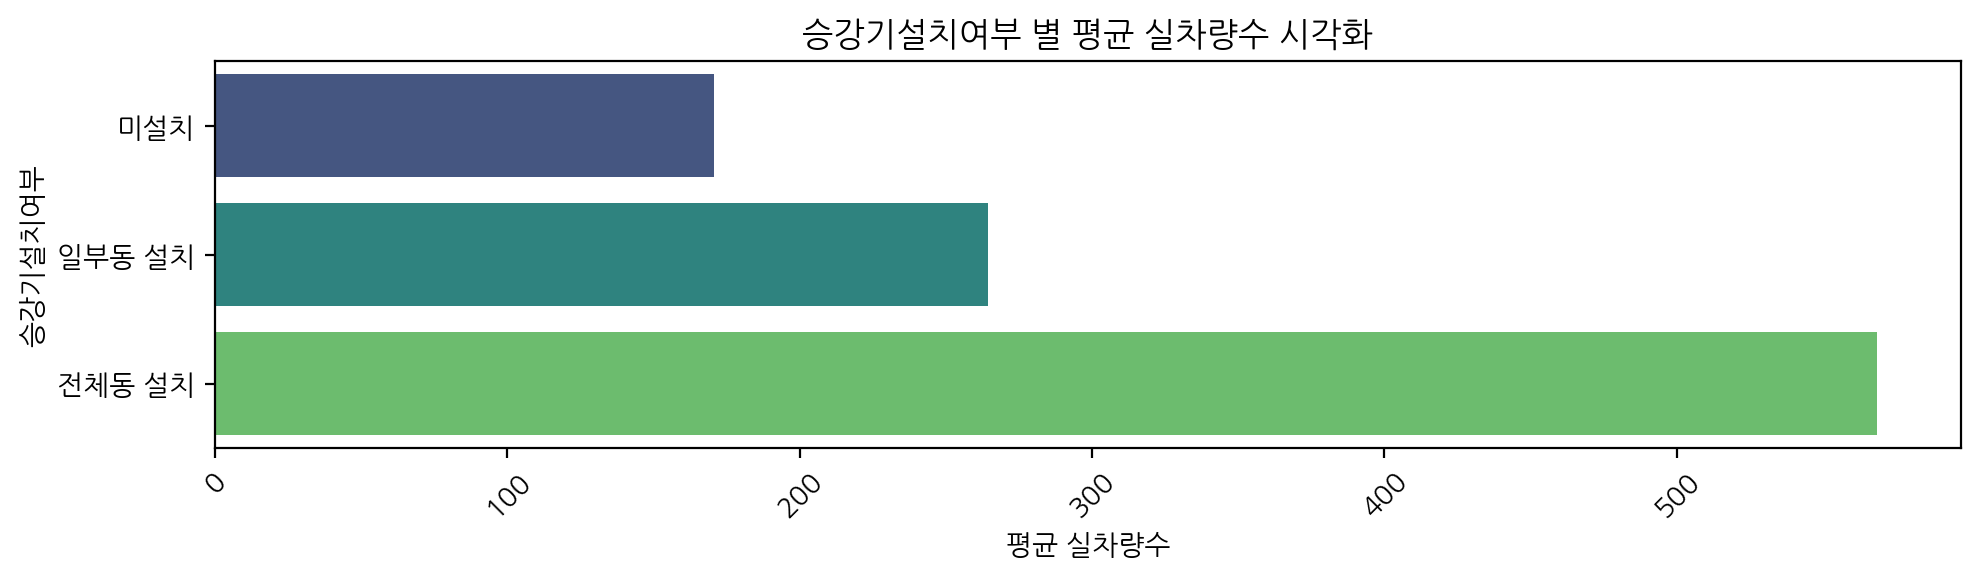

In [260]:
categorical_var = '승강기설치여부'
categorical_vs_target(apart, '실차량수', categorical_var)

## 5. 추가 전처리

- '난방방식', '승강기설치여부' 두 변수에 대해서 적은 수의 범주로 묶는 작업을 진행합니다.
- '단지코드'는 개별적인 값이므로 예측과 관련이 없으니 제거합니다.
- '지역' 변수는 지역별 특성을 고려하기에는 너무 세분화 되어 있고, 특징으로 통합하기 어려우므로 제거합니다.

### (1) 난방방식

- '난방방식' 변수의 값을 다음과 같이 변경하여 세 개의 범줏값만 갖게 합니다.
    - 개별가스난방 → 개별
    - 개별유류난방 → 개별
    - 지역난방 → 지역
    - 지역가스난방 → 지역
    - 지역유류난방 → 지역
    - 중앙가스난방 → 중앙
    - 중앙난방 → 중앙
    - 중앙유류난방 → 중앙

In [262]:
# '난방방식' 변수 값 변경
apart['난방방식'] = apart['난방방식'].replace({
    '개별가스난방': '개별',
    '개별유류난방': '개별',
    '지역난방': '지역',
    '지역가스난방': '지역',
    '지역유류난방': '지역',
    '중앙가스난방': '중앙',
    '중앙난방': '중앙',
    '중앙유류난방': '중앙'
})

# 변경된 난방방식 확인
print(apart['난방방식'].value_counts())

난방방식
개별    211
지역    115
중앙     19
Name: count, dtype: int64


### (2) 승강기설치여부

- '승강기설치여부' 변수의 값을 다음과 같이 변경하여 0, 1 값을 갖게 합니다.
    - 전체동 설치 → 1
    - 일부동 설치 → 0
    - 미설치 → 0

In [265]:

# '승강기설치여부' 변수 값 변경
apart['승강기설치여부'] = apart['승강기설치여부'].replace({
    '전체동 설치': 1,
    '일부동 설치': 0,
    '미설치': 0
})

# 변경된 승강기설치여부 확인
print(apart['승강기설치여부'].value_counts())

승강기설치여부
1    333
0     12
Name: count, dtype: int64


### (3) 단지코드, 지역 제거

- '단지코드', '지역' 변수를 제거합니다.

In [268]:
# '단지코드'와 '지역' 변수를 제거
apart = apart.drop(columns=['단지코드', '지역'])

- 최종 데이터를 확인합니다.

In [271]:
# 변경된 데이터프레임 확인
apart.head()

,총세대수,준공연도,건물형태,난방방식,승강기설치여부,실차량수,총면적,10-30,30-40,40-50,50-60,60-70,70-80,80-200,임대보증금,임대료
0,78,2013,계단식,개별,1,109,6023.7683,0,0,0,78,0,0,0,5.696200e+07,642930.000000
1,35,2013,복도식,개별,1,35,1569.1668,35,0,0,0,0,0,0,6.306200e+07,470100.000000
2,88,2013,계단식,개별,1,88,7180.1396,0,0,0,88,0,0,0,7.219000e+07,586540.000000
3,477,2014,복도식,지역,1,943,47058.9273,0,0,0,150,0,216,111,1.015167e+08,950305.000000
4,15,2013,복도식,개별,1,21,543.0268,15,0,0,0,0,0,0,5.522750e+07,340148.333333


## 6. 데이터 셋 저장

- joblib.dump() 함수를 사용하여 최종 데이터 셋을 파일로 저장합니다.
- 파일 이름은 base_data2.pkl로 합니다.

In [274]:
# 파일로 저장
joblib.dump(apart, 'base_data2.pkl')

['base_data2.pkl']